**Name : Sayantani Saha**

**Roll No. MDS202345**

In [ ]:
!pip install dvc
!pip install dvc[gdrive]

###Import Necessary Libraries and Dataset

In [2]:
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

df = df[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

###EDA

In [5]:
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates(keep='first')
print('Duplicates:', df.duplicated().sum())

403
Duplicates: 0


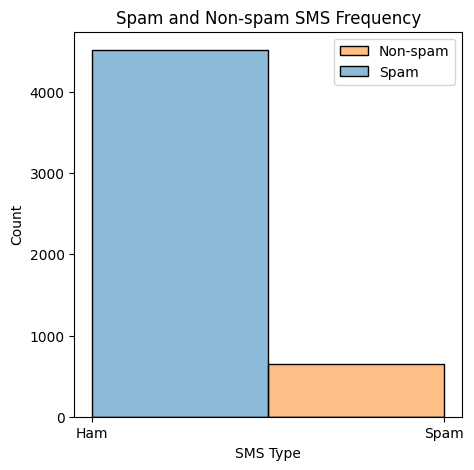

In [6]:
# Rename columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Convert labels to binary values: 'spam' -> 1, 'ham' -> 0
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Plot the histogram
plt.figure(figsize=(5,5))
sns.histplot(data=df, x='label', hue='label', bins=2)
plt.xlabel("SMS Type")
plt.xticks([0, 1], ["Ham", "Spam"])  # Labeling the x-axis properly
plt.title("Spam and Non-spam SMS Frequency")
plt.legend(["Non-spam", "Spam"])
plt.show()

In [7]:
# Ensure required resources are downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Function for text preprocessing
def preprocess_sms(text):
    text = str(text)

    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\W+', ' ', text)  # Remove special characters

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)

    # Lemmatization
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split())

    return text

# Apply preprocessing to the emails dataset
df['message'] = df['message'].apply(preprocess_sms)


In [9]:
# Remove words of size 1
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

# Display first few rows to verify
print(df.head())

   label                                            message
0      0  go jurong point crazy available bugis great wo...
1      0                              ok lar joking wif oni
2      1  free entry wkly comp win fa cup final tkts st ...
3      0                      dun say early hor already say
4      0                nah think go usf life around though


In [10]:
# Save it as raw_data.csv
df.to_csv("raw_data.csv", index=False)

df= pd.read_csv("raw_data.csv")
df.head()

,label,message
0,0,go jurong point crazy available bugis great wo...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,dun say early hor already say
4,0,nah think go usf life around though


###Save the Split Data

In [11]:
X = df.drop(columns=["label"])
y = df["label"]

# Split dataset into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state= 1)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1)

# Recombine X and y to save as CSV
train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_validation, y_validation], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Save the splits
train.to_csv("train.csv", index=False)
validation.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)


# Verify the distribution with seed = 1
print("Train Set Distribution:\n", train["label"].value_counts())
print("Validation Set Distribution:\n", validation["label"].value_counts())
print("Test Set Distribution:\n", test["label"].value_counts())

Train Set Distribution:
 label
0    3617
1     518
Name: count, dtype: int64
Validation Set Distribution:
 label
0    728
1     99
Name: count, dtype: int64
Test Set Distribution:
 label
0    171
1     36
Name: count, dtype: int64


###Implement DVC

In [12]:
!rm -rf .dvc

In [13]:
!git init  # Initialize Git
!dvc init  # Initialize DVC

Reinitialized existing Git repository in /content/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [14]:
!git config --global user.name "Sayantani"
!git config --global user.email "sayantani.vivo@gmail.com"

In [15]:
!dvc add raw_data.csv
!git add raw_data.csv.dvc .gitignore
!git commit -m "Track raw dataset with DVC"

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Adding raw_data.csv to cache:   0% 0/1 [00:00<?, ?file/s]
Adding raw_data.csv to cache:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
                                                                     
Checking out /content/raw_data.csv:   0% 0/1 [00:00<?, ?files/s]
Checking out /content/raw_data.csv:   0% 0/1 [00:00<?, ?files/s{'info': ''}]
Adding...: 100% 1/1 [00:00<00:00, 20.25file/s{'info': ''}]

To track the changes with git, run:

	git add raw_data.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	drive/
	sample_data/
	sayantani-ip-e9dbd760a8fb.json
	spam.csv
	test.csv
	train.csv
	validation.csv


It took 5.29 seconds to enum

In [16]:
!dvc remote add -d myremote gdrive://1hmsKqhMP_DHAlRv79U9C03a9cL9iigCX
!dvc remote modify myremote gdrive_use_service_account true
!dvc remote modify myremote gdrive_service_account_json_file_path sayantani-ip-e9dbd760a8fb.json


Setting 'myremote' as a default remote.


In [17]:
!dvc remote list

myremote	gdrive://1hmsKqhMP_DHAlRv79U9C03a9cL9iigCX


In [18]:
cat .dvc/config

[core]
    remote = myremote
['remote "myremote"']
    url = gdrive://1hmsKqhMP_DHAlRv79U9C03a9cL9iigCX
    gdrive_use_service_account = true
    gdrive_service_account_json_file_path = ../sayantani-ip-e9dbd760a8fb.json


In [19]:
!dvc push

Pushing
!
  0% |          |0/? [00:00<?,    ?files/s]
100% 1/1 [00:01<00:00,  1.28s/files{'info': ''}]
Pushing
Everything is up to date.


###Split the Data Again

In [20]:
X = df.drop(columns=["label"])
y = df["label"]

# Split dataset into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=200)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=200)

# Recombine X and y to save as CSV
train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_validation, y_validation], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Save the splits
train.to_csv("train.csv", index=False)
validation.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)


# Verify the distribution with seed = 200
print("Train Set Distribution:\n", train["label"].value_counts())
print("Validation Set Distribution:\n", validation["label"].value_counts())
print("Test Set Distribution:\n", test["label"].value_counts())

Train Set Distribution:
 label
0    3598
1     537
Name: count, dtype: int64
Validation Set Distribution:
 label
0    736
1     91
Name: count, dtype: int64
Test Set Distribution:
 label
0    182
1     25
Name: count, dtype: int64


In [21]:
!dvc add raw_data.csv
!git add raw_data.csv.dvc .gitignore
!git commit -m "seed changes"
!dvc push

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Checking out /content/raw_data.csv:   0% 0/1 [00:00<?, ?files/s]
Checking out /content/raw_data.csv:   0% 0/1 [00:00<?, ?files/s{'info': ''}]
Adding...: 100% 1/1 [00:00<00:00, 19.89file/s{'info': ''}]

To track the changes with git, run:

	git add raw_data.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	drive/
	sample_data/
	sayantani-ip-e9dbd760a8fb.json
	spam.csv
	test.csv
	train.csv
	validation.csv


It took 5.36 seconds to enumerate un

In [22]:
! git log --oneline

cd13e03 (HEAD -> master) Track raw dataset with DVC
a387343 Track raw dataset with DVC
06058e3 Track raw dataset with DVC


####Get the first version(seed = 1)

In [23]:
! dvc status
! dvc pull
! dvc checkout

Data and pipelines are up to date.
Fetching
!
  0% |          |0/? [00:00<?,    ?files/s]
Fetching
Building workspace index          |1.00 [00:00,  315entry/s]
Comparing indexes          |2.00 [00:00, 1.32kentry/s]
Applying changes          |0.00 [00:00,     ?file/s]
Everything is up to date.
Building workspace index          |1.00 [00:00, 96.1entry/s]
Comparing indexes          |2.00 [00:00, 1.12kentry/s]
Applying changes          |0.00 [00:00,     ?file/s]


In [ ]:
! git fetch
! git checkout HEAD raw_data.csv.dvc .gitignore

In [25]:
X = df.drop(columns=["label"])
y = df["label"]

# Split dataset into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2)


In [26]:
print("Train set - number of 0s:", sum(y_train == 0), "& number of 1s:", sum(y_train == 1))
print("Validation set - number of 0s:", sum(y_validation == 0), "& number of 1s:", sum(y_validation== 1))
print("Test set - number of 0s:", sum(y_test== 0), "& number of 1s:", sum(y_test== 1))

Train set - number of 0s: 3625 & number of 1s: 510
Validation set - number of 0s: 720 & number of 1s: 107
Test set - number of 0s: 171 & number of 1s: 36


####Get the updated version (seed = 200)

In [27]:
! dvc status
! dvc pull
! dvc checkout

Data and pipelines are up to date.
Fetching
!
  0% |          |0/? [00:00<?,    ?files/s]
Fetching
Building workspace index          |1.00 [00:00,  307entry/s]
Comparing indexes          |2.00 [00:00, 1.37kentry/s]
Applying changes          |0.00 [00:00,     ?file/s]
Everything is up to date.
Building workspace index          |1.00 [00:00,  101entry/s]
Comparing indexes          |2.00 [00:00, 1.11kentry/s]
Applying changes          |0.00 [00:00,     ?file/s]


In [ ]:
! git checkout HEAD raw_data.csv.dvc .gitignore

In [29]:
X = df.drop(columns=["label"])
y = df["label"]

# Split dataset into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

print("Train set - number of 0s:", sum(y_train == 0), "& number of 1s:", sum(y_train == 1))
print("Validation set - number of 0s:", sum(y_validation == 0), "& number of 1s:", sum(y_validation== 1))
print("Test set - number of 0s:", sum(y_test== 0), "& number of 1s:", sum(y_test== 1))

Train set - number of 0s: 3613 & number of 1s: 522
Validation set - number of 0s: 715 & number of 1s: 112
Test set - number of 0s: 188 & number of 1s: 19
